In [62]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Read the Excel files
comments_predictions_df = pd.read_excel('Data/Comments_predictions.xlsx')
classified_posts_df = pd.read_excel('Data/Classified_Posts.xlsx')

# Count the number of rows in each original dataframe
initial_comments_count = comments_predictions_df.shape[0]
initial_classified_count = classified_posts_df.shape[0]

# Selecting specific columns from classified_posts_df
columns_to_join = ['Comments', 'Likes', 'Date created', 'Posts_ru', 'Category', 'Confidence']
classified_posts_selected = classified_posts_df[['URL'] + columns_to_join]

# Merging dataframes on the 'URL' column
merged_df = pd.merge(comments_predictions_df, classified_posts_selected, on='URL', how='left')

# Update the columns_to_join list to reflect the renamed column
columns_to_join = ['Comments', 'Likes', 'Date created', 'Posts_ru', 'Category', 'Confidence']

# Count the number of merged rows
merged_count = merged_df.shape[0]

# Identify the number of non-merged rows
non_merged_count = initial_comments_count - merged_df.dropna(subset=columns_to_join).shape[0]

# Save the merged dataframe to a new Excel file
merged_df.to_excel('Data/Merged_Data.xlsx', index=False)

# Print the counts
print(f"Initial number of rows in Comments Predictions: {initial_comments_count}")
print(f"Initial number of rows in Classified Posts: {initial_classified_count}")
print(f"Number of rows after merging: {merged_count}")
print(f"Number of non-merged rows from Comments Predictions: {non_merged_count}")

Initial number of rows in Comments Predictions: 741348
Initial number of rows in Classified Posts: 23341
Number of rows after merging: 741348
Number of non-merged rows from Comments Predictions: 10068


In [71]:
merged_df = pd.read_excel('Data/Merged_Data.xlsx')
merged_df = merged_df.dropna(subset=columns_to_join)
merged_df['Date created'] = pd.to_datetime(merged_df['Date created']).dt.date

In [72]:
# Renaming the columns
merged_df = merged_df.rename(columns={'Date created': 'Date_created','Comments': 'Comments_count', 'Comment_ru': 'Comment_text', 'Posts_ru': 'Post_text'})

# Define the new column order
new_column_order = ['Post_text', 'URL', 'Date_created', 'Comments_count', 'Likes', 'Category', 'Confidence', 'Comment_text', 'Predicted_Label']

# Reorder the columns
merged_df = merged_df[new_column_order]
merged_df

,Post_text,URL,Date_created,Comments_count,Likes,Category,Confidence,Comment_text,Predicted_Label
0,Тошкент ахборот технологиялари университетига ...,`https://www.instagram.com/p/CGHRj31Dmf5,2020-10-09,15.0,1622.0,жамият,0.962413,соққани кил.,Neutral
1,Тошкент ахборот технологиялари университетига ...,`https://www.instagram.com/p/CGHRj31Dmf5,2020-10-09,15.0,1622.0,жамият,0.962413,яна битта текинхур,Negative
2,Тошкент ахборот технологиялари университетига ...,`https://www.instagram.com/p/CGHRj31Dmf5,2020-10-09,15.0,1622.0,жамият,0.962413,инсоф берсин,Neutral
3,Тошкент ахборот технологиялари университетига ...,`https://www.instagram.com/p/CGHRj31Dmf5,2020-10-09,15.0,1622.0,жамият,0.962413,"2016-2018 инхада ректор булган экан,2017-2019 ...",Negative
4,Тошкент ахборот технологиялари университетига ...,`https://www.instagram.com/p/CGHRj31Dmf5,2020-10-09,15.0,1622.0,жамият,0.962413,такой довольный,Positive
...,...,...,...,...,...,...,...,...,...
741343,Жорий йилнинг 3 март куни Тошкент вилоятида яш...,`https://www.instagram.com/p/CMD_iF-KFzI,2021-03-06,126.0,3591.0,жиноят,0.896571,бу гап зерип қизиқcи бор вахтам бор ади 5000$,Negative
741344,Жорий йилнинг 3 март куни Тошкент вилоятида яш...,`https://www.instagram.com/p/CMD_iF-KFzI,2021-03-06,126.0,3591.0,жиноят,0.896571,шудай хабар беришади гуеки бу нарса биринчи ма...,Positive
741345,Жорий йилнинг 3 март куни Тошкент вилоятида яш...,`https://www.instagram.com/p/CMD_iF-KFzI,2021-03-06,126.0,3591.0,жиноят,0.896571,5000 доллор бериб кириб качонда шунча пулни чи...,Negative
741346,Жорий йилнинг 3 март куни Тошкент вилоятида яш...,`https://www.instagram.com/p/CMD_iF-KFzI,2021-03-06,126.0,3591.0,жиноят,0.896571,силарда анчейкана каерда,Positive


In [73]:
# Translate Category column from Uzbek to English
category_translation = {
    'жамият': 'Society',
    'саломатлик': 'Health',
    'спорт': 'Sports',
    'дунё': 'World',
    'фан ва техника': 'Science and Technology',
    'сиёсат': 'Politics',
    'жиноят': 'Crime',
    'иқтисодиёт': 'Economy',
    'маданият': 'Culture',
    'шоу-бизнес': 'Show Business'
}

# Renaming the categories in the DataFrame
merged_df['Category'] = merged_df['Category'].map(category_translation)

# Re-categorizing the Category column
merged_df['Category'] = merged_df.apply(lambda row: row['Category'] if row['Confidence'] > 0.50 else 'Miscellaneous', axis=1)

# Display the DataFrame
merged_df

,Post_text,URL,Date_created,Comments_count,Likes,Category,Confidence,Comment_text,Predicted_Label
0,Тошкент ахборот технологиялари университетига ...,`https://www.instagram.com/p/CGHRj31Dmf5,2020-10-09,15.0,1622.0,Society,0.962413,соққани кил.,Neutral
1,Тошкент ахборот технологиялари университетига ...,`https://www.instagram.com/p/CGHRj31Dmf5,2020-10-09,15.0,1622.0,Society,0.962413,яна битта текинхур,Negative
2,Тошкент ахборот технологиялари университетига ...,`https://www.instagram.com/p/CGHRj31Dmf5,2020-10-09,15.0,1622.0,Society,0.962413,инсоф берсин,Neutral
3,Тошкент ахборот технологиялари университетига ...,`https://www.instagram.com/p/CGHRj31Dmf5,2020-10-09,15.0,1622.0,Society,0.962413,"2016-2018 инхада ректор булган экан,2017-2019 ...",Negative
4,Тошкент ахборот технологиялари университетига ...,`https://www.instagram.com/p/CGHRj31Dmf5,2020-10-09,15.0,1622.0,Society,0.962413,такой довольный,Positive
...,...,...,...,...,...,...,...,...,...
741343,Жорий йилнинг 3 март куни Тошкент вилоятида яш...,`https://www.instagram.com/p/CMD_iF-KFzI,2021-03-06,126.0,3591.0,Crime,0.896571,бу гап зерип қизиқcи бор вахтам бор ади 5000$,Negative
741344,Жорий йилнинг 3 март куни Тошкент вилоятида яш...,`https://www.instagram.com/p/CMD_iF-KFzI,2021-03-06,126.0,3591.0,Crime,0.896571,шудай хабар беришади гуеки бу нарса биринчи ма...,Positive
741345,Жорий йилнинг 3 март куни Тошкент вилоятида яш...,`https://www.instagram.com/p/CMD_iF-KFzI,2021-03-06,126.0,3591.0,Crime,0.896571,5000 доллор бериб кириб качонда шунча пулни чи...,Negative
741346,Жорий йилнинг 3 март куни Тошкент вилоятида яш...,`https://www.instagram.com/p/CMD_iF-KFzI,2021-03-06,126.0,3591.0,Crime,0.896571,силарда анчейкана каерда,Positive


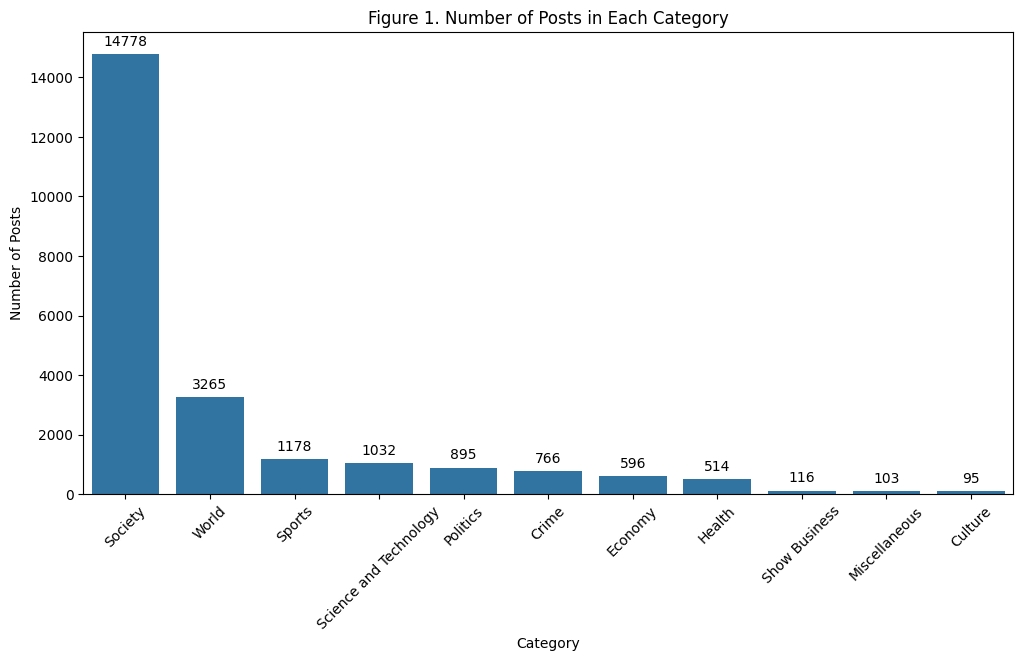

In [74]:
# Count the number of unique URLs in each category
unique_url_counts = merged_df.groupby('Category')['URL'].nunique()

# Sort the counts in descending order
unique_url_counts_sorted = unique_url_counts.sort_values(ascending=False)

# Create the bar plot with sorted values
plt.figure(figsize=(12, 6))
barplot = sns.barplot(x=unique_url_counts_sorted.index, y=unique_url_counts_sorted.values)

# Add labels and title
plt.xlabel('Category')
plt.ylabel('Number of Posts')
plt.title('Figure 1. Number of Posts in Each Category')
plt.xticks(rotation=45)

# Add numbers on top of each bar
for p in barplot.patches:
    barplot.annotate(format(p.get_height(), '.0f'), 
                     (p.get_x() + p.get_width() / 2., p.get_height()), 
                     ha = 'center', va = 'center', 
                     xytext = (0, 9), 
                     textcoords = 'offset points')

# Show the plot
plt.show()

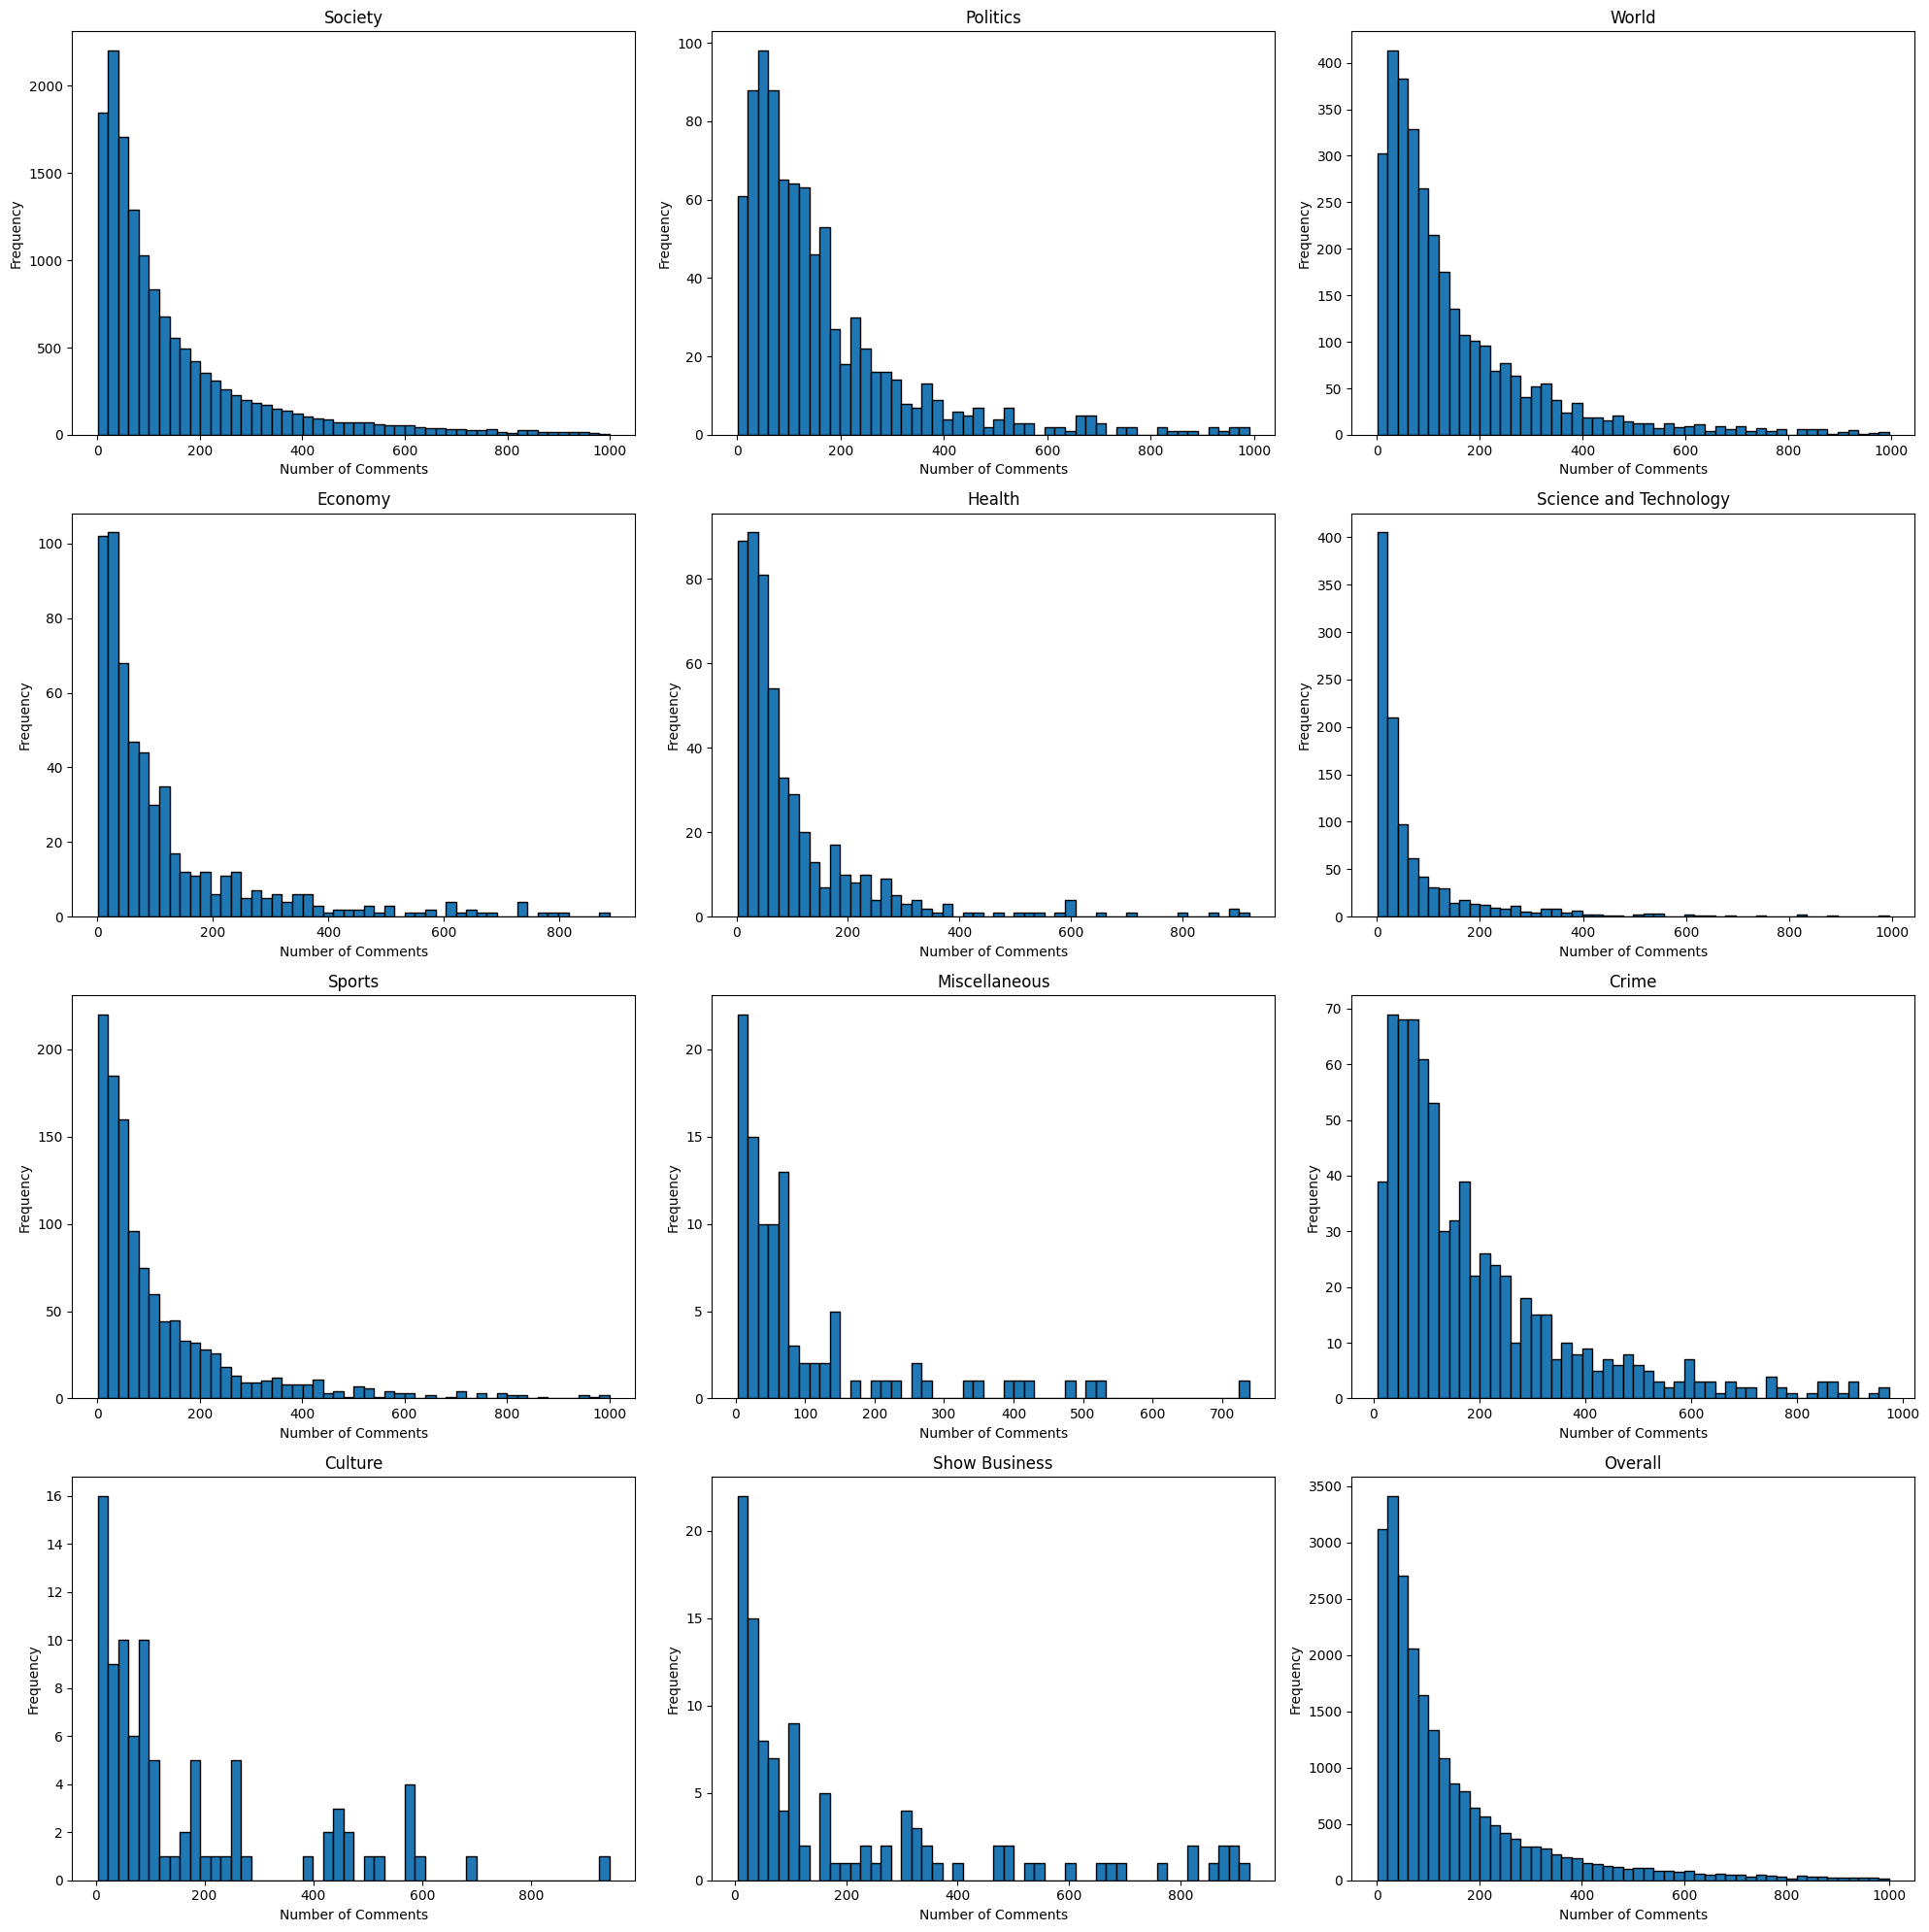

In [75]:
# Convert Comments_count to numeric
merged_df['Comments_count'] = pd.to_numeric(merged_df['Comments_count'], errors='coerce')

# Drop NaN values from Comments_count to avoid errors in plotting
merged_df = merged_df.dropna(subset=['Comments_count'])

# Filter out Comments_count greater than 1000
merged_df = merged_df[merged_df['Comments_count'] <= 1000]

# Aggregate Comments_count for each unique URL
aggregated_comments = merged_df.groupby(['URL', 'Category'])['Comments_count'].max().reset_index()

# Get the unique categories
categories = aggregated_comments['Category'].unique()

# Set up the matplotlib figure with a 4:3 layout
plt.figure(figsize=(20, 20)) 

# Rows and columns for 4:3 layout
rows = 4
cols = 3

# Determine the total number of plots (including overall plot)
total_plots = rows * cols
num_categories = len(categories)
plots_for_categories = total_plots - 1  # Reserve one slot for the overall plot

# Loop through each category and create a subplot for histogram
for i, category in enumerate(categories[:plots_for_categories], 1):
    plt.subplot(rows, cols, i)
    category_data = aggregated_comments[aggregated_comments['Category'] == category]['Comments_count']
    plt.hist(category_data, bins=50, edgecolor='black')
    plt.title(f'{category}')
    plt.xlabel('Number of Comments')
    plt.ylabel('Frequency')

# Overall histogram in the last slot of the grid
plt.subplot(rows, cols, total_plots)
overall_comments = aggregated_comments['Comments_count']
plt.hist(overall_comments, bins=50, edgecolor='black')  # Overall plot
plt.title('Overall')
plt.xlabel('Number of Comments')
plt.ylabel('Frequency')

# Adjust layout for better viewing
plt.tight_layout()
plt.show()


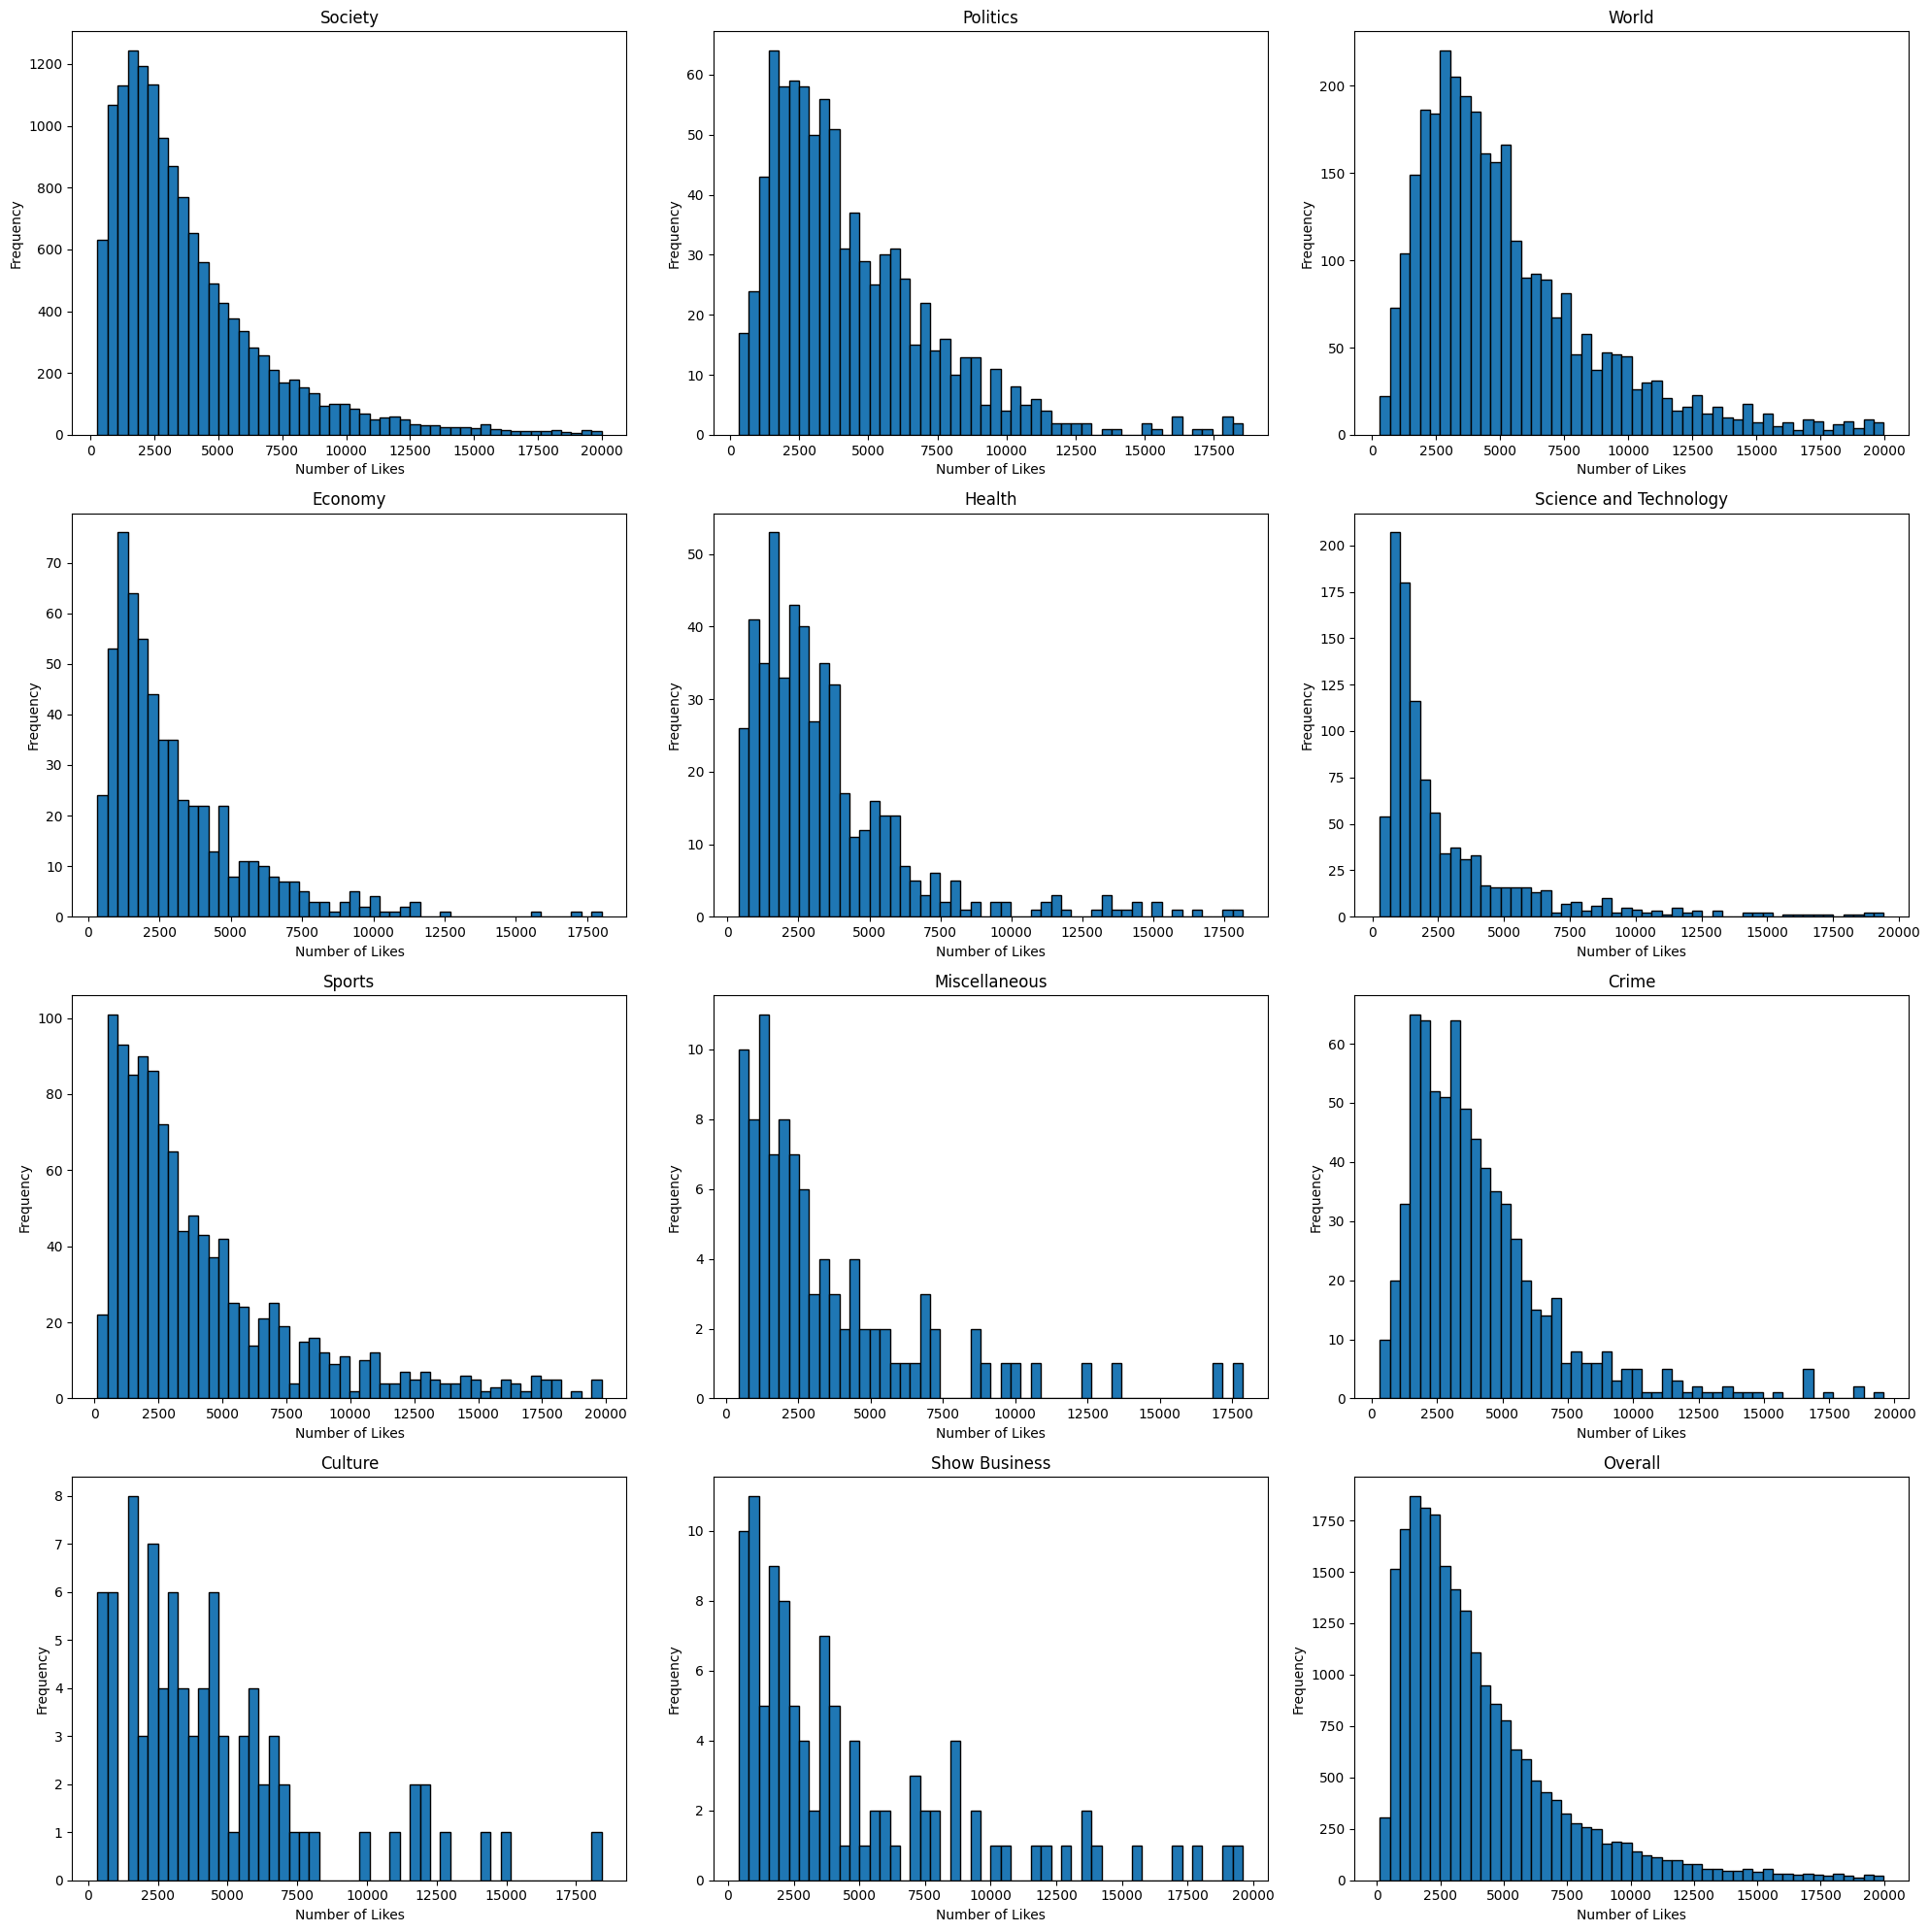

In [76]:
# Convert Likes to numeric
merged_df['Likes'] = pd.to_numeric(merged_df['Likes'], errors='coerce')

# Drop NaN values from Likes to avoid errors in plotting
merged_df = merged_df.dropna(subset=['Likes'])

# Filter out Likes greater than 20,000
merged_df = merged_df[merged_df['Likes'] <= 20000]

# Aggregate Likes for each unique URL
aggregated_likes = merged_df.groupby(['URL', 'Category'])['Likes'].max().reset_index()

# Get the unique categories
categories = aggregated_likes['Category'].unique()

# Set up the matplotlib figure with a 3:4 layout
plt.figure(figsize=(20, 20)) 

# Rows and columns for layout
rows = 4
cols = 3

# Determine the total number of plots 
total_plots = rows * cols
num_categories = len(categories)
plots_for_categories = total_plots - 1  

# Loop through each category and create a subplot for histogram 
for i, category in enumerate(categories[:plots_for_categories], 1):
    plt.subplot(rows, cols, i)
    category_data = aggregated_likes[aggregated_likes['Category'] == category]['Likes']
    plt.hist(category_data, bins=50, edgecolor='black') 
    plt.title(f'{category}')
    plt.xlabel('Number of Likes')
    plt.ylabel('Frequency')

# Overall histogram in the last slot of the grid
plt.subplot(rows, cols, total_plots)
overall_likes = aggregated_likes['Likes']
plt.hist(overall_likes, bins=50, edgecolor='black')  # Overall plot
plt.title('Overall')
plt.xlabel('Number of Likes')
plt.ylabel('Frequency')

# Adjust layout for better viewing
plt.tight_layout()
plt.show()

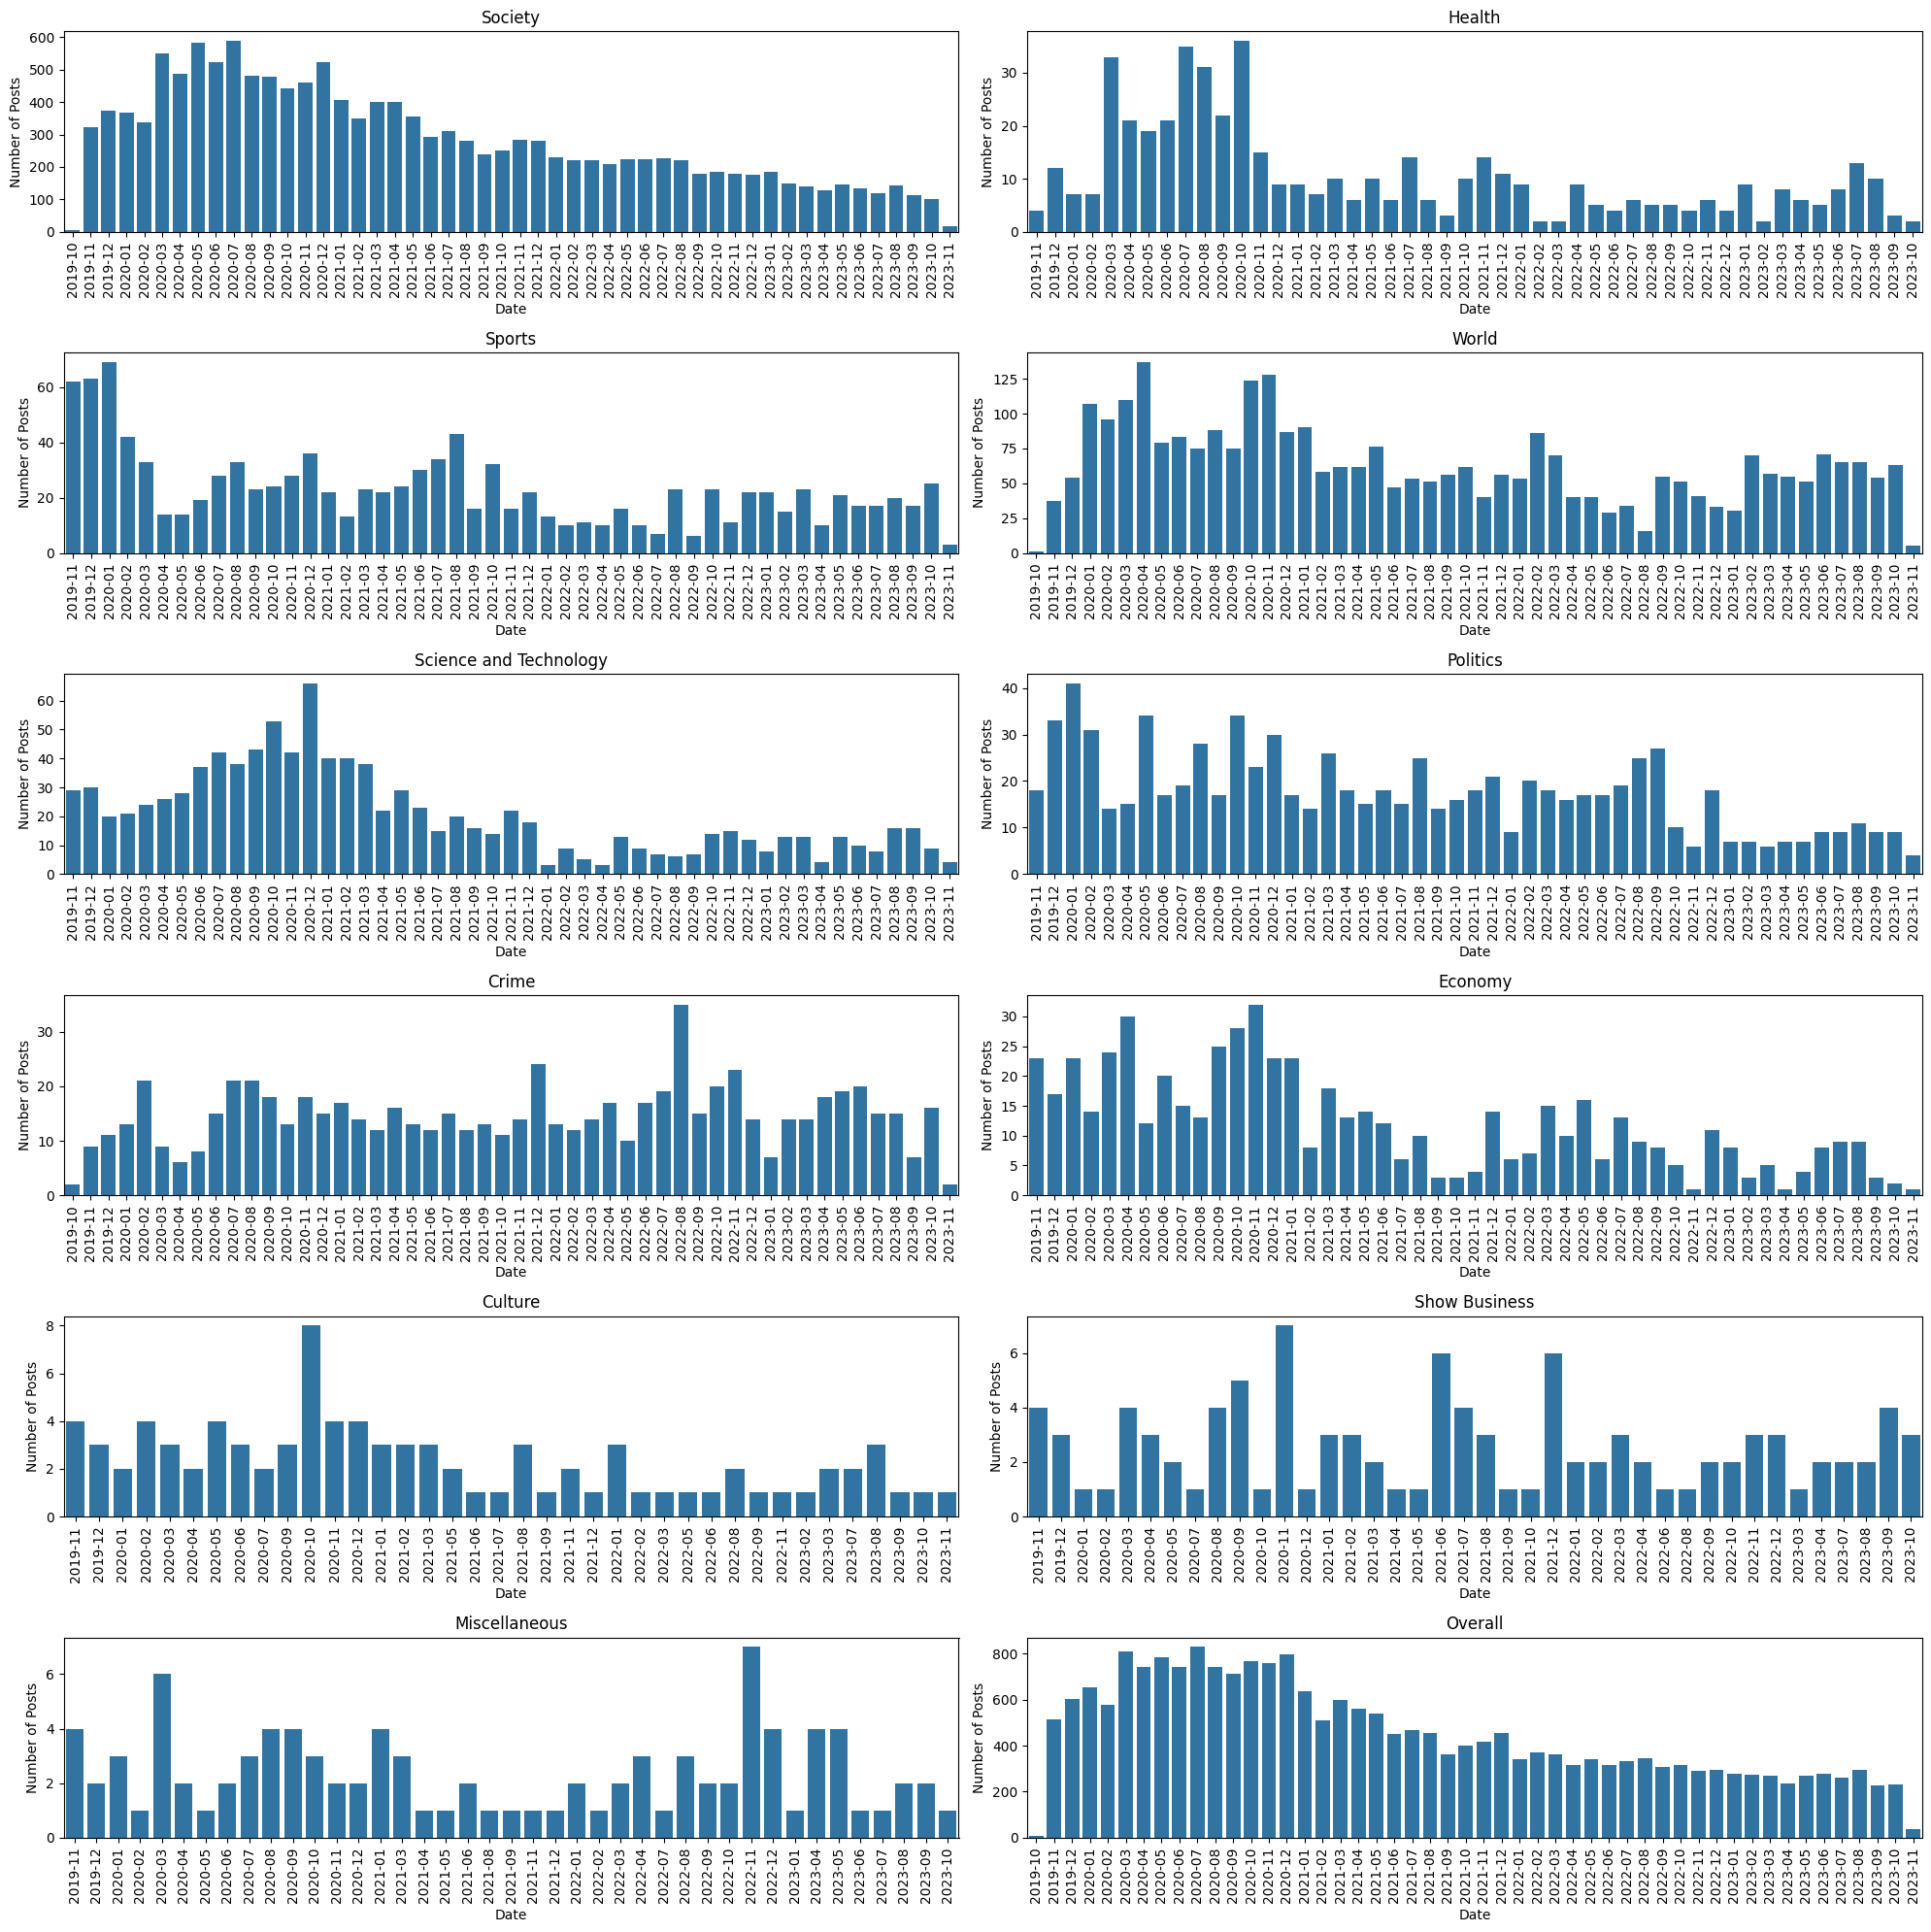

In [77]:
# Convert Date_created to datetime and extract month
merged_df['Date_created'] = pd.to_datetime(merged_df['Date_created'])
merged_df['Month'] = merged_df['Date_created'].dt.to_period('M')

# Group by Month and Category, then count unique URLs
monthly_category_group = merged_df.groupby(['Month', 'Category'])['URL'].nunique().reset_index(name='Unique_Posts')

# Group by Month for overall data, irrespective of Category
monthly_overall_group = merged_df.groupby('Month')['URL'].nunique().reset_index(name='Unique_Posts')

# Get the unique categories
categories = merged_df['Category'].unique()
num_plots = len(categories) + 1  # +1 for the overall plot

# Set up the matplotlib figure
plt.figure(figsize=(20, 20))  

# Rows and columns for 2:6 layout
rows = 2
cols = 6

# Plot for each category
for i, category in enumerate(categories, 1):
    plt.subplot(cols, rows, i)
    category_data = monthly_category_group[monthly_category_group['Category'] == category]
    sns.barplot(x='Month', y='Unique_Posts', data=category_data)
    plt.title(f'{category}')
    plt.xlabel('Date')
    plt.ylabel('Number of Posts')
    plt.xticks(rotation=90)

# Plot for overall data
plt.subplot(cols, rows, num_plots)
sns.barplot(x='Month', y='Unique_Posts', data=monthly_overall_group)
plt.title('Overall')
plt.xlabel('Date')
plt.ylabel('Number of Posts')
plt.xticks(rotation=90)

# Adjust layout for better viewing
plt.tight_layout()
plt.show()

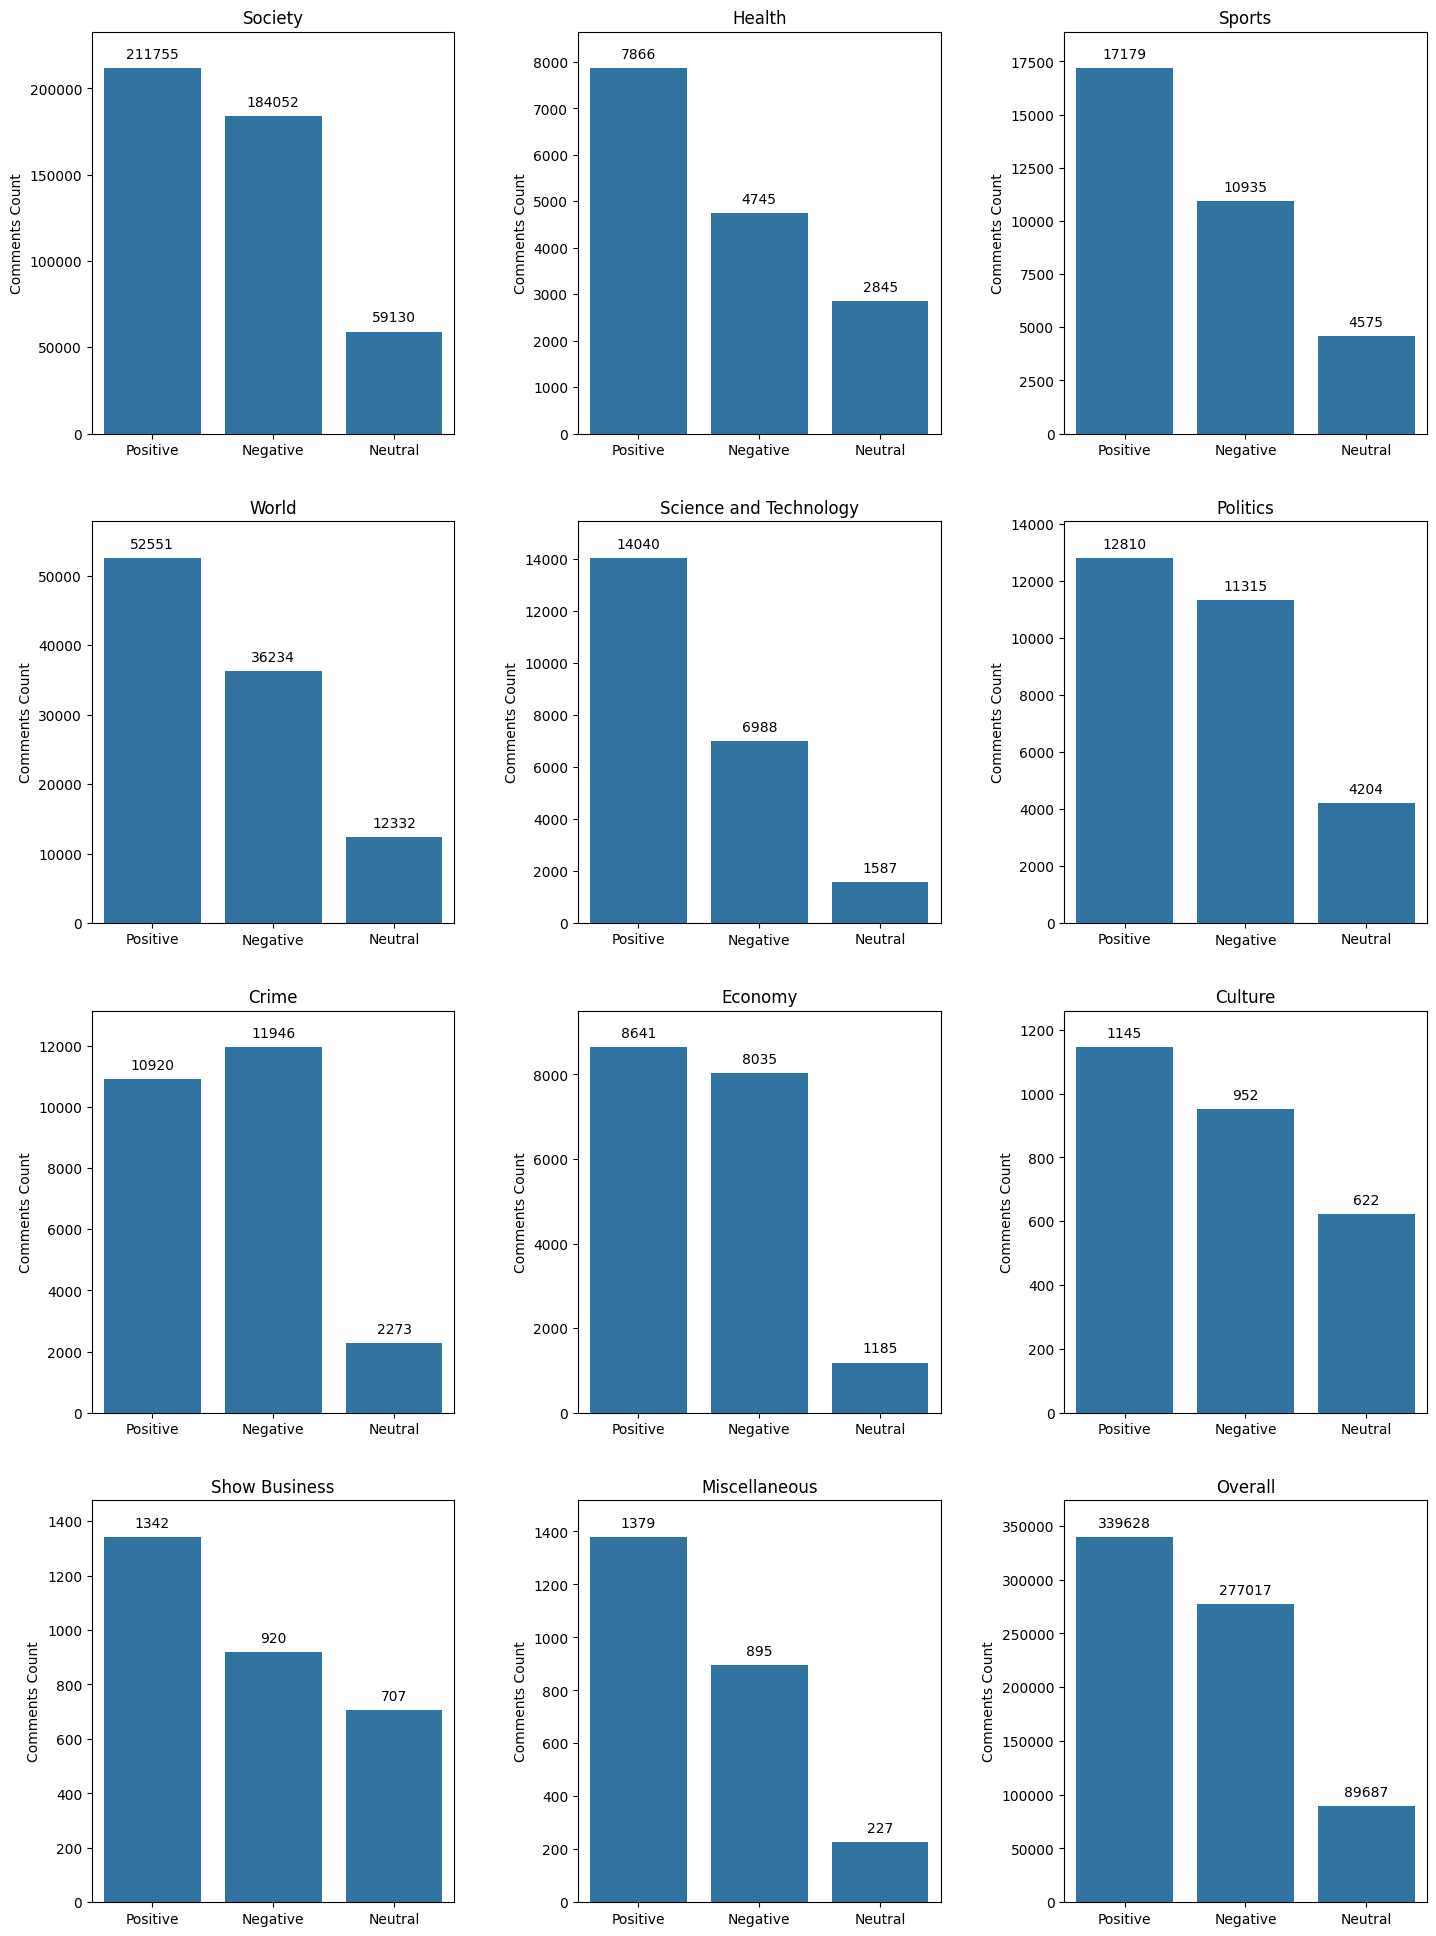

In [84]:
# Count the occurrences of each Predicted_Label within each Category
label_category_group = merged_df.groupby(['Category', 'Predicted_Label'])['URL'].count().reset_index(name='Count')

# Define the order of labels
label_order = ['Positive', 'Negative', 'Neutral']

# Set up the matplotlib figure
plt.figure(figsize=(15, 20)) 

# Get the unique categories
categories = merged_df['Category'].unique()
num_categories = len(categories) + 1  # +1 for the overall plot

# Layout dimensions
rows = 4
cols = 3

# Loop through each category and create a subplot for bar plot
for i, category in enumerate(categories, 1):
    ax = plt.subplot(rows, cols, i)
    
    # Filter the data for the current category
    category_data = label_category_group[label_category_group['Category'] == category]

    # Create a bar plot
    barplot = sns.barplot(x='Predicted_Label', y='Count', data=category_data, order=label_order)

    # Add margins inside the subplot
    ax.margins(y=0.1) 

    # Add counts above bars
    for p in barplot.patches:
        barplot.annotate(f'{int(p.get_height())}', 
                         (p.get_x() + p.get_width() / 2., p.get_height()), 
                         ha='center', va='center', 
                         xytext=(0, 10), 
                         textcoords='offset points')

    plt.title(f'{category}')
    plt.ylabel('Comments Count')
    plt.xlabel('')

# Overall plot
ax = plt.subplot(rows, cols, num_categories)
overall_label_count = merged_df['Predicted_Label'].value_counts()[label_order].reset_index(name='Count')
overall_label_count = overall_label_count.rename(columns={'index': 'Predicted_Label'})
barplot = sns.barplot(x='Predicted_Label', y='Count', data=overall_label_count, order=label_order)
ax.margins(y=0.1) 
for p in barplot.patches:
    barplot.annotate(f'{int(p.get_height())}', 
                     (p.get_x() + p.get_width() / 2., p.get_height()), 
                     ha='center', va='center', 
                     xytext=(0, 10), 
                     textcoords='offset points')

plt.title('Overall')
plt.ylabel('Comments Count')
plt.xlabel('')

# Adjust layout with padding
plt.tight_layout(pad=3.0)
plt.show()


In [79]:
# Count the number of 'Positive' and 'Negative' labels for each URL
label_counts = merged_df.groupby(['URL', 'Predicted_Label']).size().unstack(fill_value=0)

# Determine the dominant label for each post
def label_post(row):
    if row['Positive'] > row['Negative']:
        return 'Positive'
    elif row['Negative'] > row['Positive']:
        return 'Negative'
    else:
        return 'Neutral'

label_counts['Dominant_Label'] = label_counts.apply(label_post, axis=1)

# Merge the dominant label back to the original DataFrame
merged_df = merged_df.merge(label_counts[['Dominant_Label']], on='URL', how='left')
merged_df

,Post_text,URL,Date_created,Comments_count,Likes,Category,Confidence,Comment_text,Predicted_Label,Month,Dominant_Label
0,Тошкент ахборот технологиялари университетига ...,`https://www.instagram.com/p/CGHRj31Dmf5,2020-10-09,15.0,1622.0,Society,0.962413,соққани кил.,Neutral,2020-10,Neutral
1,Тошкент ахборот технологиялари университетига ...,`https://www.instagram.com/p/CGHRj31Dmf5,2020-10-09,15.0,1622.0,Society,0.962413,яна битта текинхур,Negative,2020-10,Neutral
2,Тошкент ахборот технологиялари университетига ...,`https://www.instagram.com/p/CGHRj31Dmf5,2020-10-09,15.0,1622.0,Society,0.962413,инсоф берсин,Neutral,2020-10,Neutral
3,Тошкент ахборот технологиялари университетига ...,`https://www.instagram.com/p/CGHRj31Dmf5,2020-10-09,15.0,1622.0,Society,0.962413,"2016-2018 инхада ректор булган экан,2017-2019 ...",Negative,2020-10,Neutral
4,Тошкент ахборот технологиялари университетига ...,`https://www.instagram.com/p/CGHRj31Dmf5,2020-10-09,15.0,1622.0,Society,0.962413,такой довольный,Positive,2020-10,Neutral
...,...,...,...,...,...,...,...,...,...,...,...
706327,Жорий йилнинг 3 март куни Тошкент вилоятида яш...,`https://www.instagram.com/p/CMD_iF-KFzI,2021-03-06,126.0,3591.0,Crime,0.896571,бу гап зерип қизиқcи бор вахтам бор ади 5000$,Negative,2021-03,Positive
706328,Жорий йилнинг 3 март куни Тошкент вилоятида яш...,`https://www.instagram.com/p/CMD_iF-KFzI,2021-03-06,126.0,3591.0,Crime,0.896571,шудай хабар беришади гуеки бу нарса биринчи ма...,Positive,2021-03,Positive
706329,Жорий йилнинг 3 март куни Тошкент вилоятида яш...,`https://www.instagram.com/p/CMD_iF-KFzI,2021-03-06,126.0,3591.0,Crime,0.896571,5000 доллор бериб кириб качонда шунча пулни чи...,Negative,2021-03,Positive
706330,Жорий йилнинг 3 март куни Тошкент вилоятида яш...,`https://www.instagram.com/p/CMD_iF-KFzI,2021-03-06,126.0,3591.0,Crime,0.896571,силарда анчейкана каерда,Positive,2021-03,Positive


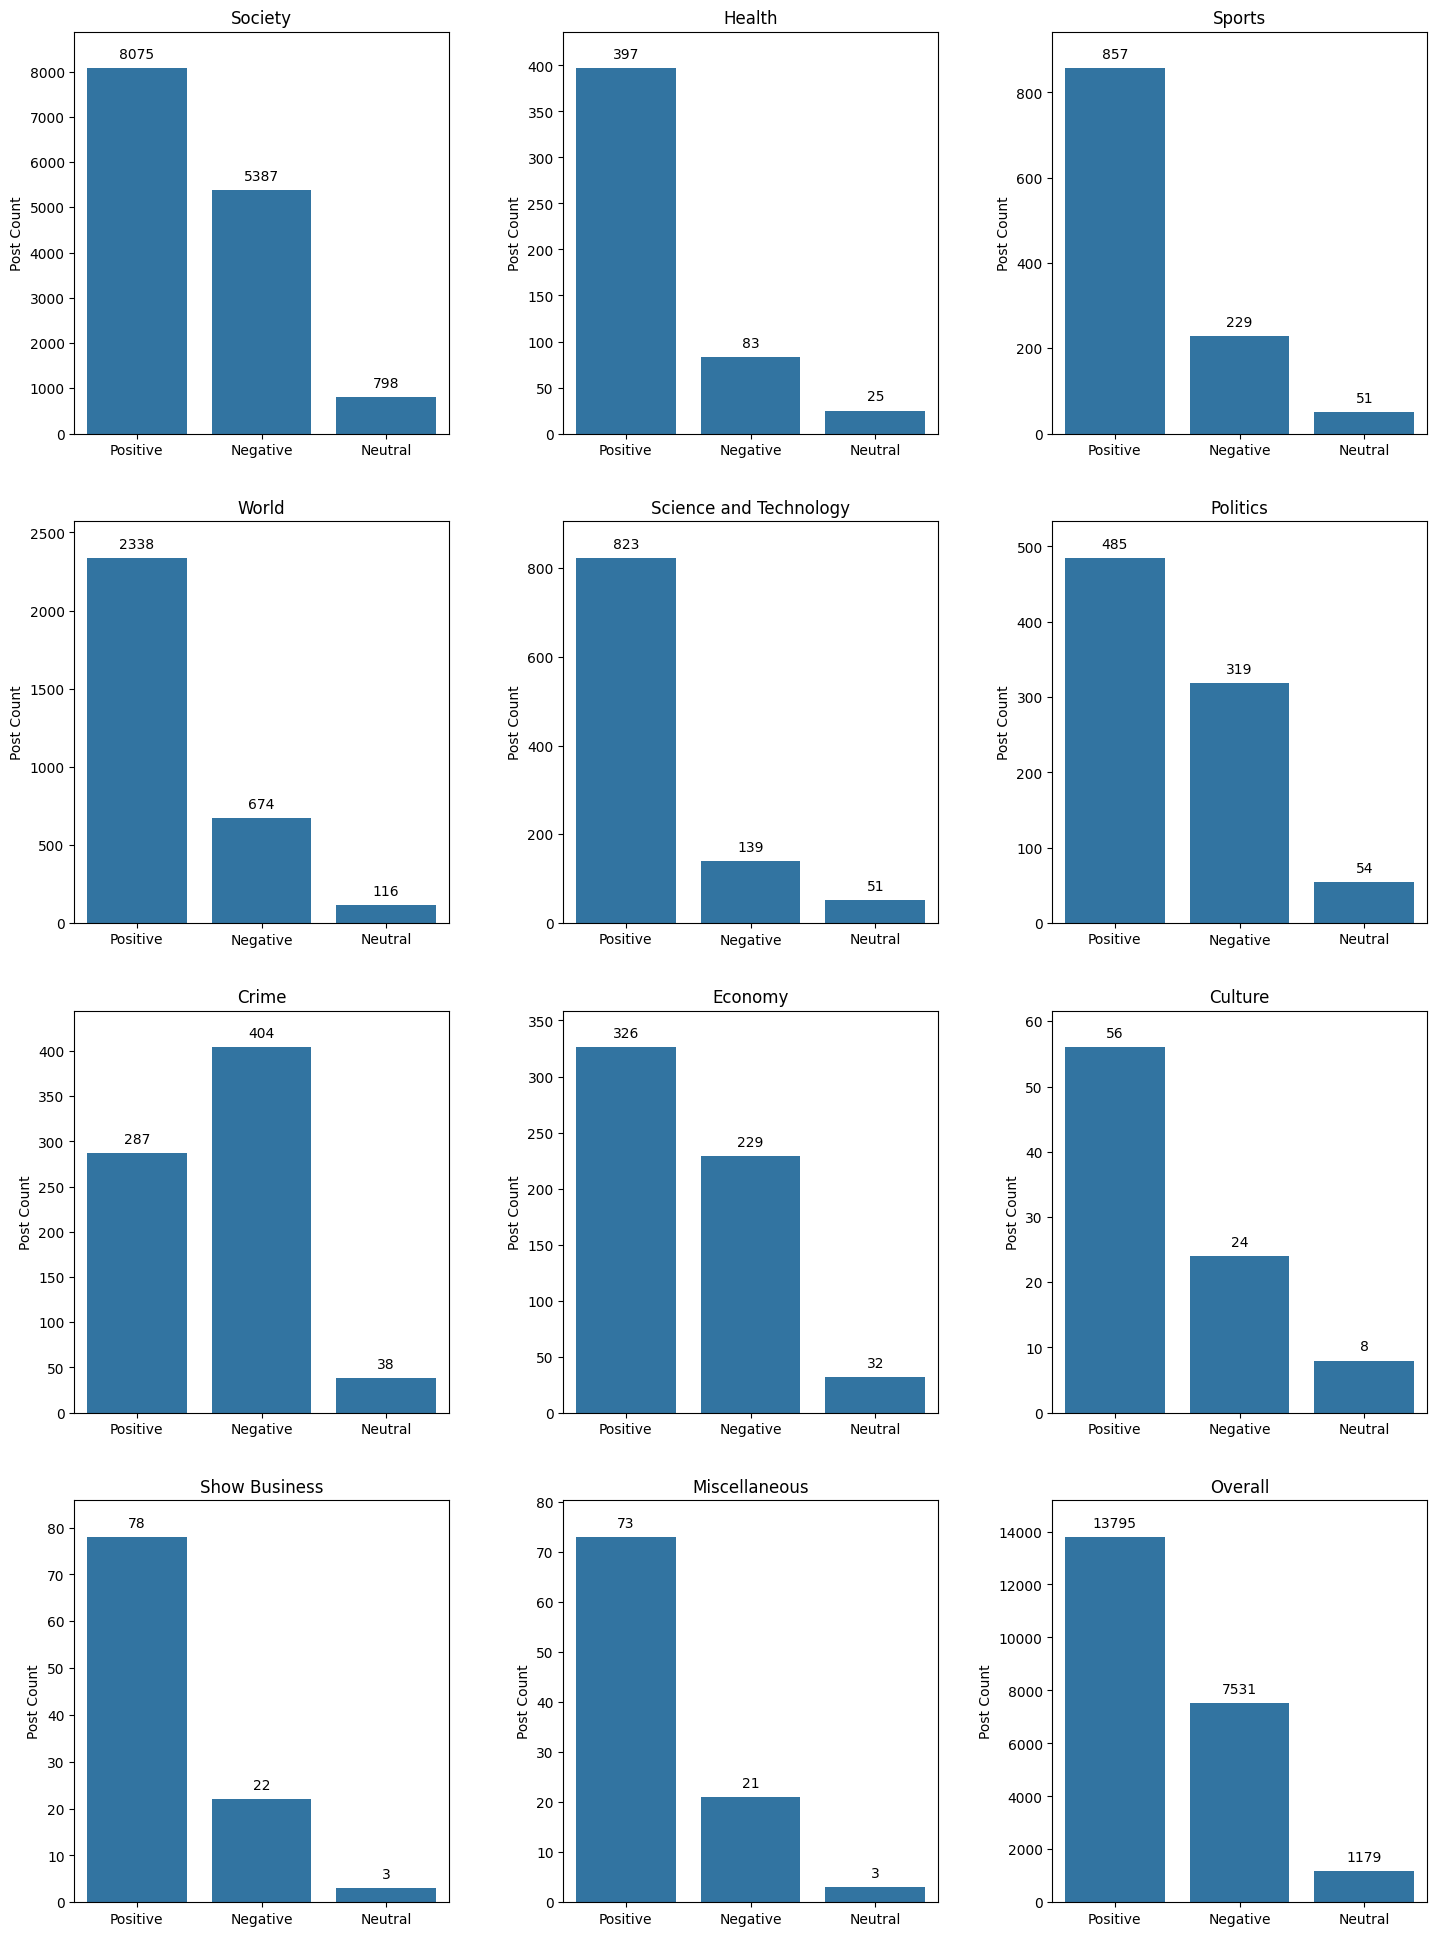

In [85]:
# Define the order for the labels
label_order = ['Positive', 'Negative', 'Neutral']

# Count the occurrences of each Dominant_Label within each Category for unique posts
dominant_label_group = merged_df.groupby(['URL', 'Category'])['Dominant_Label'].agg(lambda x: x.value_counts().idxmax()).reset_index()

# Count the occurrences of each Dominant_Label within each Category
category_label_count = dominant_label_group.groupby(['Category', 'Dominant_Label']).size().reset_index(name='Count')

# Set up the matplotlib figure with a 4:3 layout
plt.figure(figsize=(15, 20))

# Rows and columns for 4:3 layout
rows = 4
cols = 3

# Get the unique categories
categories = merged_df['Category'].unique()

# Loop through each category and create a subplot for bar plot
for i, category in enumerate(categories, 1):
    ax = plt.subplot(rows, cols, i)
    category_data = category_label_count[category_label_count['Category'] == category]
    barplot = sns.barplot(x='Dominant_Label', y='Count', data=category_data, order=label_order)

    # Add margins inside the subplot
    ax.margins(y=0.1) 

    # Add counts above bars
    for p in barplot.patches:
        barplot.annotate(f'{int(p.get_height())}', 
                         (p.get_x() + p.get_width() / 2., p.get_height()), 
                         ha='center', va='center', 
                         xytext=(0, 10), 
                         textcoords='offset points')
    plt.title(f'{category}')
    plt.xlabel('')
    plt.ylabel('Post Count')

# Overall distribution
ax = plt.subplot(rows, cols, len(categories) + 1) 
overall_label_count = dominant_label_group['Dominant_Label'].value_counts()[label_order].reset_index(name='Count')
overall_label_count = overall_label_count.rename(columns={'index': 'Dominant_Label'})
barplot = sns.barplot(x='Dominant_Label', y='Count', data=overall_label_count, order=label_order)
ax.margins(y=0.1) 

# Add counts above bars in overall plot
for p in barplot.patches:
    barplot.annotate(f'{int(p.get_height())}', 
                     (p.get_x() + p.get_width() / 2., p.get_height()), 
                     ha='center', va='center', 
                     xytext=(0, 10), 
                     textcoords='offset points')

plt.title('Overall')
plt.xlabel('')
plt.ylabel('Post Count')

plt.tight_layout(pad=3.0)
plt.show()


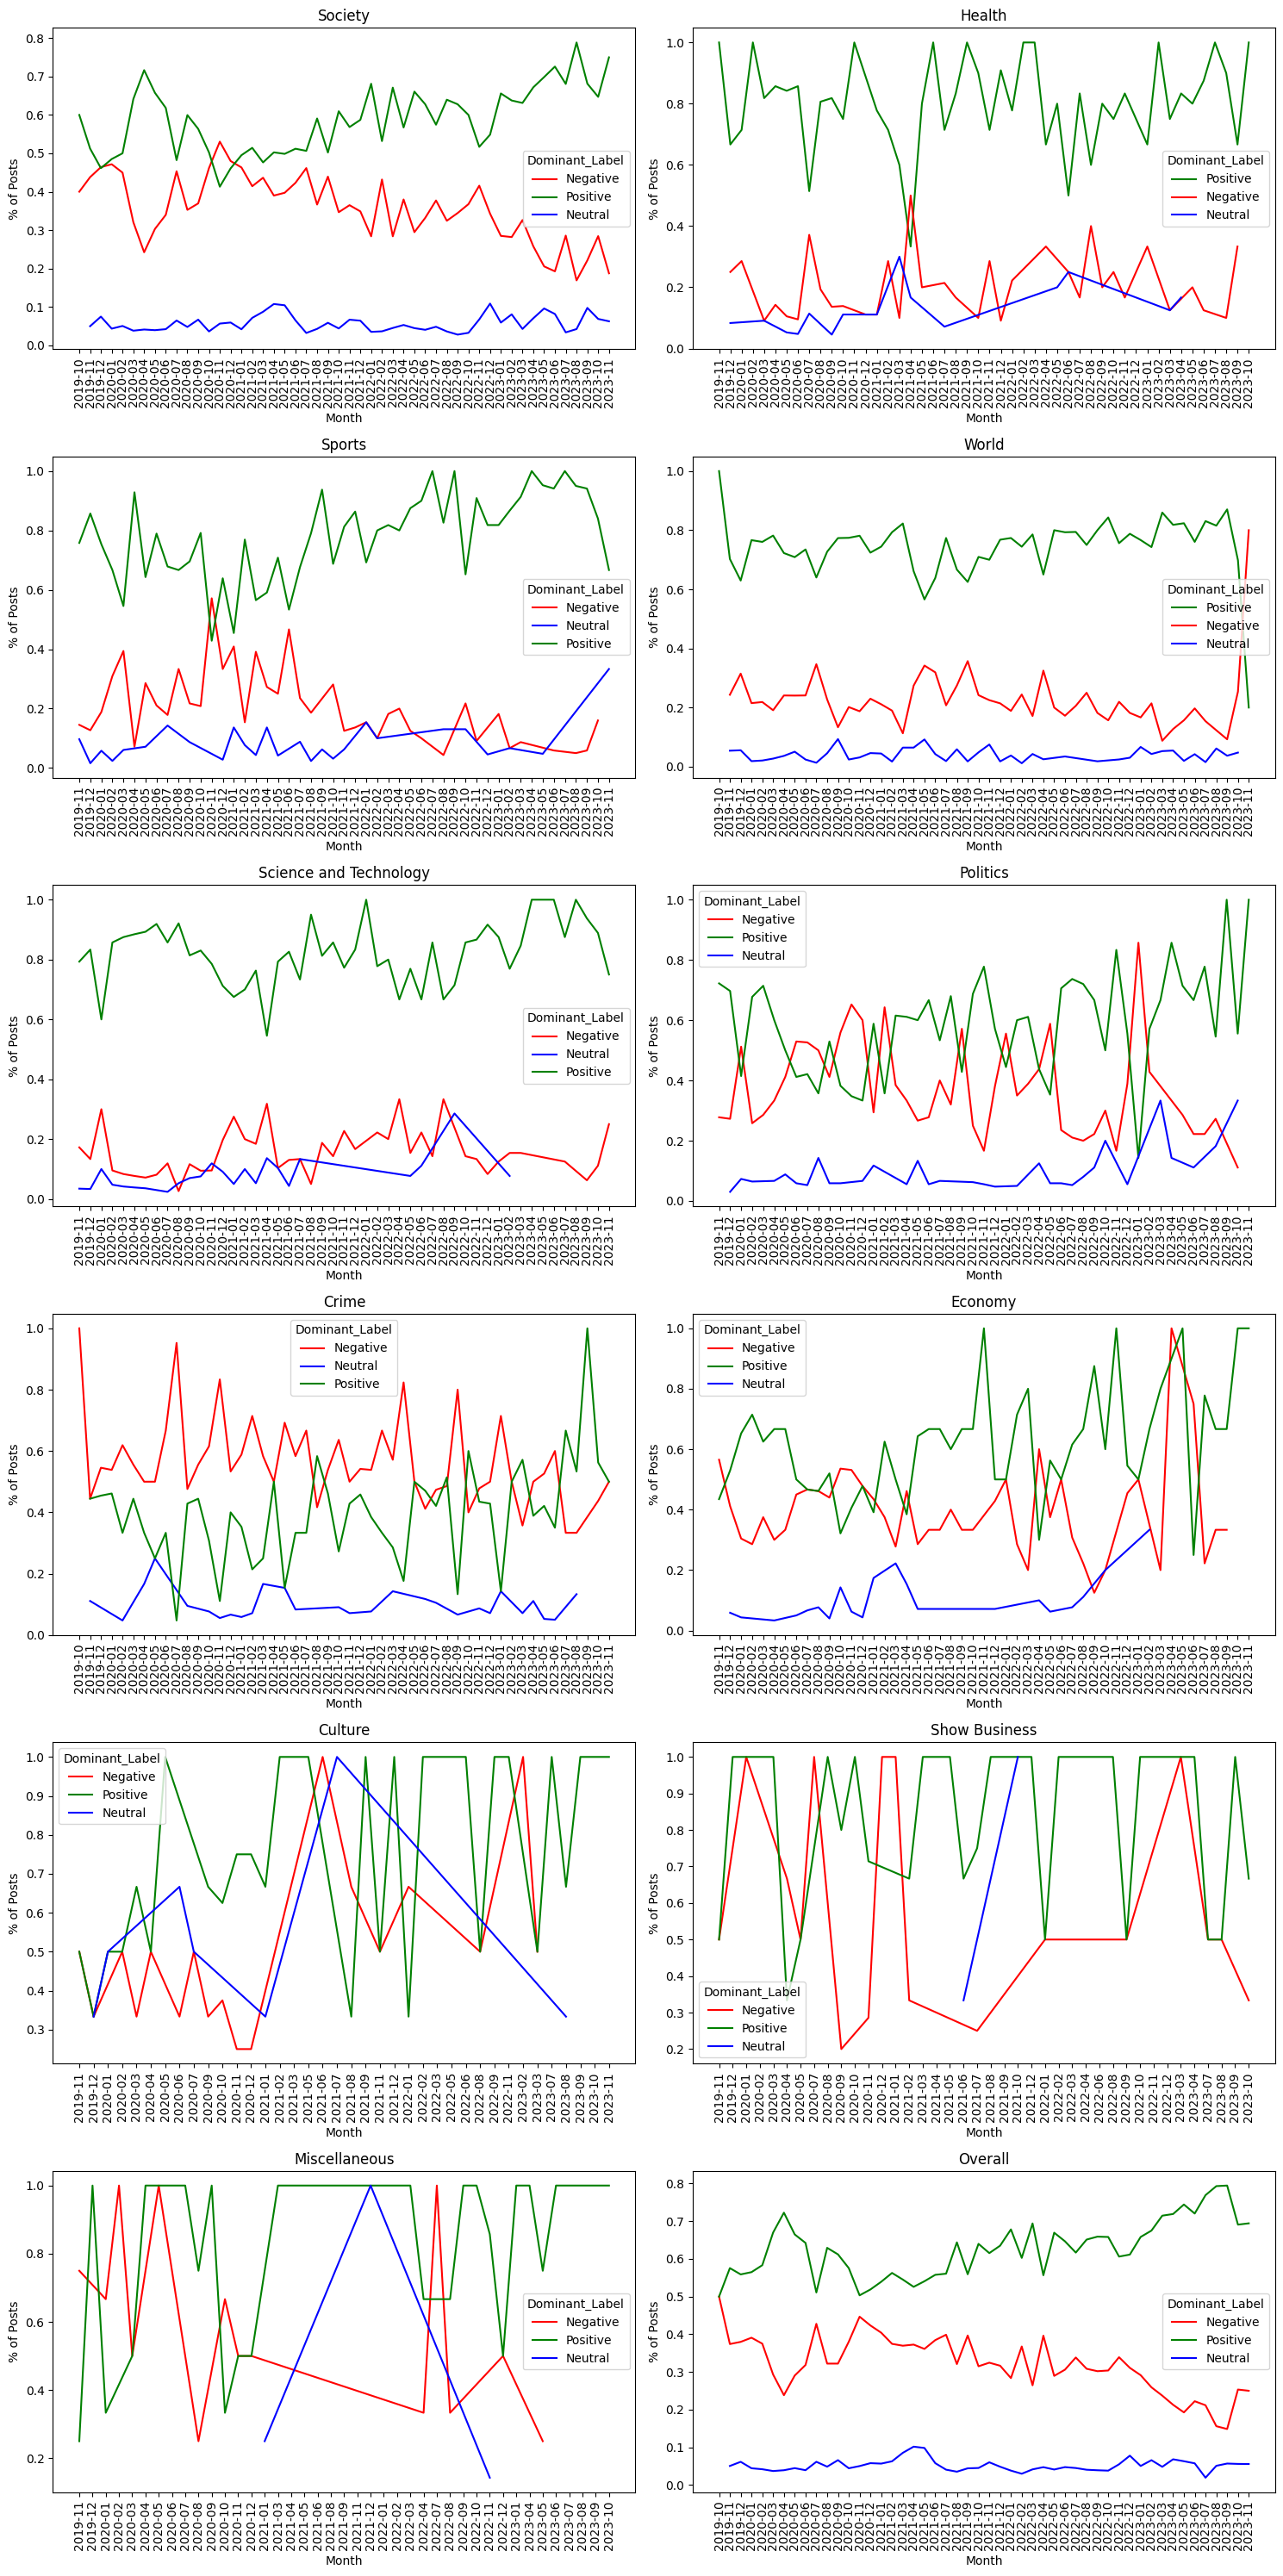

In [81]:
# Define the color palette
palette = {'Positive': 'green', 'Negative': 'red', 'Neutral': 'blue'}

# Extract month
merged_df['Month'] = merged_df['Date_created'].dt.to_period('M')

# Convert 'Month' to string for plotting
merged_df['Month_Str'] = merged_df['Month'].astype(str)

# Aggregate the count of Dominant_Labels for each unique post in each month and category
monthly_label_count = merged_df.groupby(['Month_Str', 'Category', 'Dominant_Label'])['URL'].nunique().reset_index(name='Unique_Posts_Count')

# Aggregate the total count of posts for each month and category
monthly_total_count = merged_df.groupby(['Month_Str', 'Category'])['URL'].nunique().reset_index(name='Total_Posts_Count')

# Merge the counts with the total counts for categories
normalized_data = pd.merge(monthly_label_count, monthly_total_count, on=['Month_Str', 'Category'])

# Calculate normalized post counts for categories
normalized_data['Normalized_Posts_Count'] = normalized_data['Unique_Posts_Count'] / normalized_data['Total_Posts_Count']

# Aggregate the total count of posts for overall in each month
monthly_overall_total_count = merged_df.groupby('Month_Str')['URL'].nunique().reset_index(name='Overall_Total_Posts_Count')

# Aggregate the count of Dominant_Labels for each unique post in each month
monthly_label_count_total = merged_df.groupby(['Month_Str', 'Dominant_Label'])['URL'].nunique().reset_index(name='Unique_Posts_Count_total')

# Merge the counts with the total counts for overall
normalized_overall_data = pd.merge(monthly_label_count_total, monthly_overall_total_count, on='Month_Str')

# Calculate normalized post counts for overall
normalized_overall_data['Normalized_Overall_Posts_Count'] = normalized_overall_data['Unique_Posts_Count_total'] / normalized_overall_data['Overall_Total_Posts_Count']

# Set up the matplotlib figure with a 6:2 layout
plt.figure(figsize=(15, 30))

# Rows and columns for 6:2 layout
rows = 6
cols = 2

# Get the unique categories
categories = merged_df['Category'].unique()

# Loop through each category and create a subplot for time series plot
for i, category in enumerate(categories, 1):
    plt.subplot(rows, cols, i)
    category_data = normalized_data[normalized_data['Category'] == category]
    sns.lineplot(x='Month_Str', y='Normalized_Posts_Count', hue='Dominant_Label', data=category_data, palette=palette)
    plt.title(f'{category}')
    plt.xlabel('Month')
    plt.ylabel('% of Posts')
    plt.xticks(rotation=90)

# Overall time series plot
plt.subplot(rows, cols, rows * cols)
sns.lineplot(x='Month_Str', y='Normalized_Overall_Posts_Count', hue='Dominant_Label', data=normalized_overall_data, palette=palette)
plt.title('Overall')
plt.xlabel('Month')
plt.ylabel('% of Posts')
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

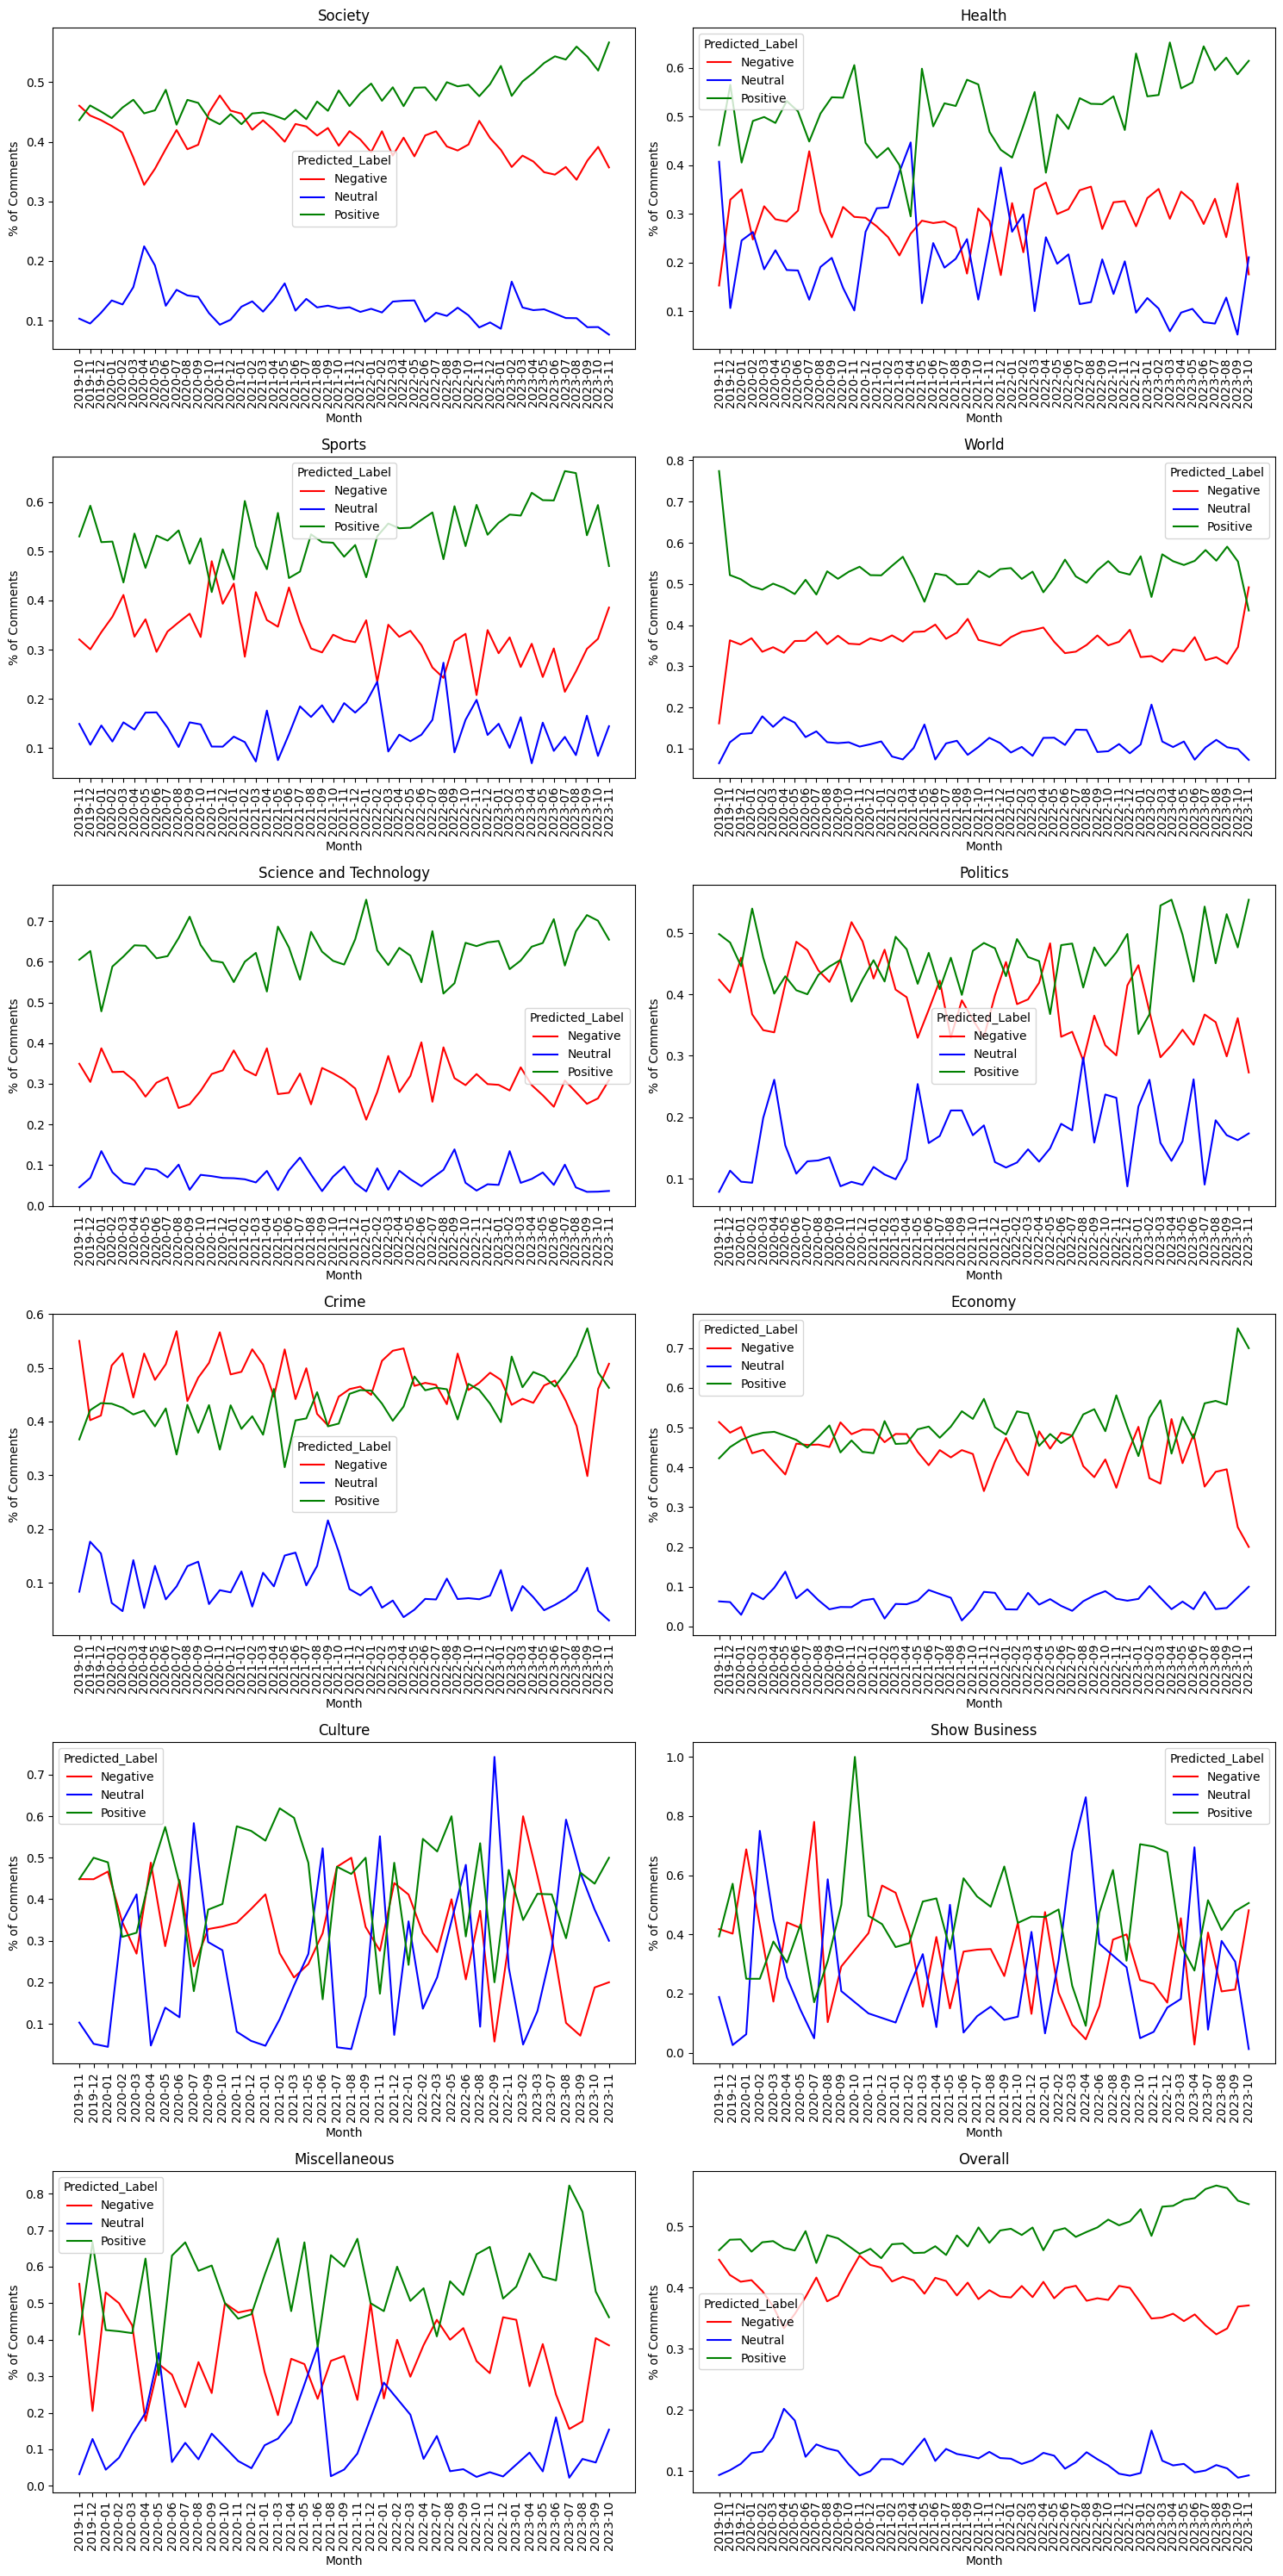

In [82]:
# Aggregate the count of Predicted_Labels for each unique comment in each month and category
monthly_label_count = merged_df.groupby(['Month_Str', 'Category', 'Predicted_Label']).size().reset_index(name='Unique_Comments_Count')

# Aggregate the total count of comments for each month and category
monthly_total_count = merged_df.groupby(['Month_Str', 'Category']).size().reset_index(name='Total_Comments_Count')

# Merge the counts with the total counts for categories
normalized_data = pd.merge(monthly_label_count, monthly_total_count, on=['Month_Str', 'Category'])

# Calculate normalized comment counts for categories
normalized_data['Normalized_Comments_Count'] = normalized_data['Unique_Comments_Count'] / normalized_data['Total_Comments_Count']

# Aggregate the total count of comments for overall in each month
monthly_overall_total_count = merged_df.groupby('Month_Str').size().reset_index(name='Overall_Total_Comments_Count')

# Aggregate the count of Predicted_Labels for each unique comment in each month
monthly_label_count_total = merged_df.groupby(['Month_Str', 'Predicted_Label']).size().reset_index(name='Unique_Comments_Count_total')

# Merge the counts with the total counts for overall
normalized_overall_data = pd.merge(monthly_label_count_total, monthly_overall_total_count, on='Month_Str')

# Calculate normalized comment counts for overall
normalized_overall_data['Normalized_Overall_Comments_Count'] = normalized_overall_data['Unique_Comments_Count_total'] / normalized_overall_data['Overall_Total_Comments_Count']

# Set up the matplotlib figure with a 6:2 layout
plt.figure(figsize=(15, 30))

# Rows and columns for 6:2 layout
rows = 6
cols = 2

# Get the unique categories
categories = merged_df['Category'].unique()

# Loop through each category and create a subplot for time series plot
for i, category in enumerate(categories, 1):
    plt.subplot(rows, cols, i)
    category_data = normalized_data[normalized_data['Category'] == category]
    sns.lineplot(x='Month_Str', y='Normalized_Comments_Count', hue='Predicted_Label', data=category_data, palette=palette)
    plt.title(f'{category}')
    plt.xlabel('Month')
    plt.ylabel('% of Comments')
    plt.xticks(rotation=90)

# Overall time series plot
plt.subplot(rows, cols, rows * cols)
sns.lineplot(x='Month_Str', y='Normalized_Overall_Comments_Count', hue='Predicted_Label', data=normalized_overall_data, palette=palette)
plt.title('Overall')
plt.xlabel('Month')
plt.ylabel('% of Comments')
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()